## Observations and Insights 

In [43]:
# Dependencies and Setup

%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# mouse_metadata = mouse_metadata.merge(study_results, on = "Mouse ID", how="inner")
combined_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
combined_df["Mouse ID"].value_counts()

g989    13
a963    10
p189    10
x402    10
a262    10
        ..
h428     1
f932     1
n482     1
u153     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [44]:
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the DataFrame.
combined_df["Mouse ID"].nunique()
combined_df["Mouse ID"].value_counts()

g989    13
a963    10
p189    10
x402    10
a262    10
        ..
h428     1
f932     1
n482     1
u153     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup=combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"],keep ='first')]
dup
#dup2=combined_df.duplicated(["Mouse ID", "Timepoint"],keep ='first') --> return Boolean series
# Optional: Get all the data for the duplicate mouse ID. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean_df=combined_df.drop_duplicates(["Mouse ID", "Timepoint"],keep ='first')

In [48]:
# Checking the number of mice in the clean DataFrame.
combined_clean_df["Mouse ID"].value_counts()

a963    10
c757    10
x402    10
a262    10
l897    10
        ..
h428     1
f932     1
n482     1
u153     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_clean_df.describe()
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

byDrug = combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean_drug= byDrug.mean()
median_drug= byDrug.median()
var_drug= byDrug.var()
std_drug= byDrug.std()
sem_drug= byDrug.sem()

Summary_stat_df=pd.DataFrame({"Mean":mean_drug,"Median":median_drug, "Variance":var_drug, 
                              "Standard Deviation":std_drug,"SEM":sem_drug})
Summary_stat_df.head(10).style.format({"Mean":"{:.2f}","Median":"{:.2f}", "Variance":"{:.2f}", 
                              "Standard Deviation":"{:.2f}","SEM":"{:.2f}"})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [51]:
#Condition for each treatment
Capomulin_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Capomulin"]
Ceftamin_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Ceftamin"]
Infubinol_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Infubinol"]
Ketapril_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Ketapril"]
Naftisol_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Naftisol"]
Placebo_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Placebo"]
Propriva_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Propriva"]
Ramicane_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Ramicane"]
Stelasyn_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Stelasyn"]
Zoniferol_df = combined_clean_df.loc[combined_clean_df["Drug Regimen"]=="Zoniferol"]


## Bar Plots

Bar using Pandas

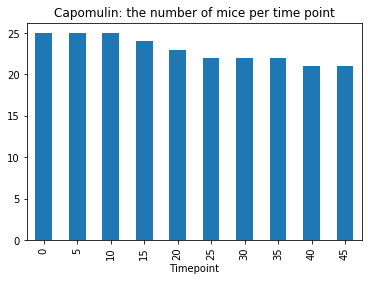

In [65]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#groupby "Timepoint"
Capomulin_grp = Capomulin_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Capomulin = Capomulin_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Capomulin.plot.bar()
plt.title("Capomulin: the number of mice per time point")
ax 

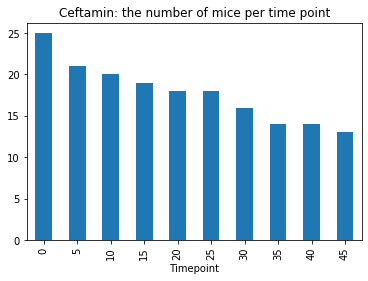

In [66]:
Ceftamin_grp = Ceftamin_df.groupby("Timepoint")
nMice_Ceftamin = Ceftamin_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Ceftamin.plot.bar()
plt.title("Ceftamin: the number of mice per time point")
ax 

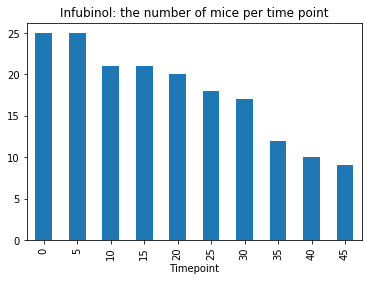

In [67]:
Infubinol_grp = Infubinol_df.groupby("Timepoint")
nMice_Infubinol = Infubinol_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Infubinol.plot.bar()
plt.title("Infubinol: the number of mice per time point")
ax 

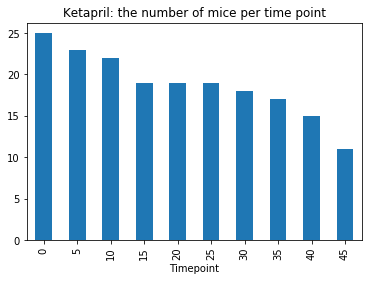

In [68]:
Ketapril_grp = Ketapril_df.groupby("Timepoint")
nMice_Ketapril = Ketapril_grp["Mouse ID"].count()  

ax = nMice_Ketapril.plot.bar()
plt.title("Ketapril: the number of mice per time point")
ax 

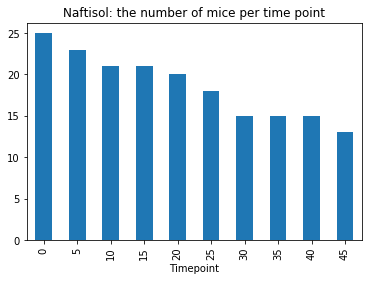

In [70]:
Naftisol_grp = Naftisol_df.groupby("Timepoint")
nMice_Naftisol = Naftisol_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Naftisol.plot.bar()
plt.title("Naftisol: the number of mice per time point")
ax 

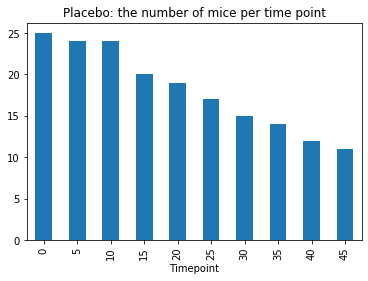

In [71]:
Placebo_grp = Placebo_df.groupby("Timepoint")
nMice_Placebo = Placebo_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Placebo.plot.bar()
plt.title("Placebo: the number of mice per time point")
ax 

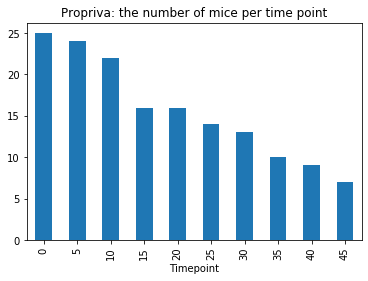

In [72]:
Propriva_grp = Propriva_df.groupby("Timepoint")
nMice_Propriva = Propriva_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Propriva.plot.bar()
plt.title("Propriva: the number of mice per time point")
ax 

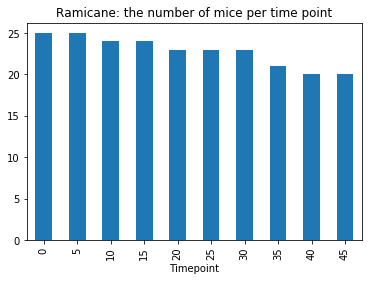

In [73]:
Ramicane_grp = Ramicane_df.groupby("Timepoint")
nMice_Ramicane = Ramicane_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Ramicane.plot.bar()
plt.title("Ramicane: the number of mice per time point")
ax 

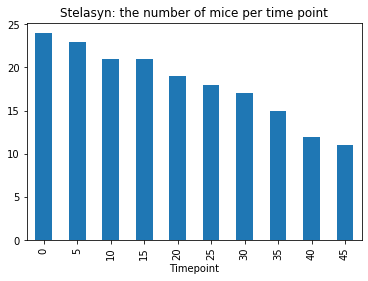

In [74]:
Stelasyn_grp = Stelasyn_df.groupby("Timepoint")
nMice_Stelasyn = Stelasyn_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Stelasyn.plot.bar()
plt.title("Stelasyn: the number of mice per time point")
ax 

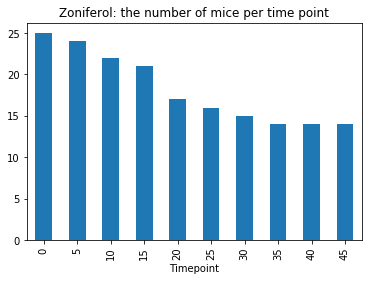

In [75]:
Zoniferol_grp = Zoniferol_df.groupby("Timepoint")
nMice_Zoniferol = Zoniferol_grp["Mouse ID"].count()  # it is pandas series. index used as x-axis

ax = nMice_Zoniferol.plot.bar()
plt.title("Zoniferol: the number of mice per time point")
ax 

In [96]:
Capomulin_df.loc[Capomulin_df["Timepoint"] == 40, "Mouse ID"].count()

21

Bar using pyplot

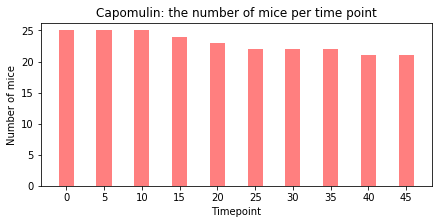

In [111]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#groupby "Timepoint"
Capomulin_grp = Capomulin_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Capomulin = Capomulin_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Capomulin_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Capomulin, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Capomulin: the number of mice per time point")
plt.show()


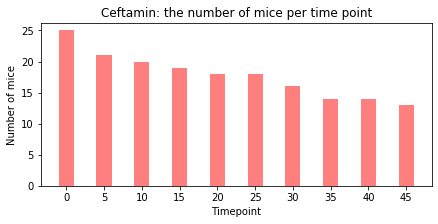

In [112]:
#groupby "Timepoint"
Ceftamin_grp = Ceftamin_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Ceftamin = Ceftamin_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Ceftamin_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Ceftamin, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Ceftamin: the number of mice per time point")
plt.show()

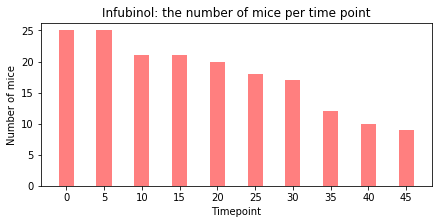

In [113]:
#groupby "Timepoint"
Infubinol_grp = Infubinol_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Infubinol =Infubinol_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Infubinol_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Infubinol, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Infubinol: the number of mice per time point")
plt.show()

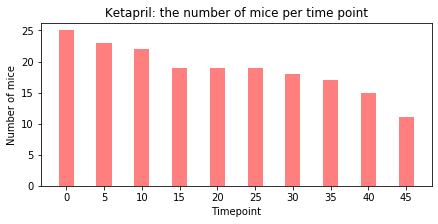

In [114]:
#groupby "Timepoint"
Ketapril_grp = Ketapril_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Ketapril =Ketapril_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Ketapril_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Ketapril, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Ketapril: the number of mice per time point")
plt.show()

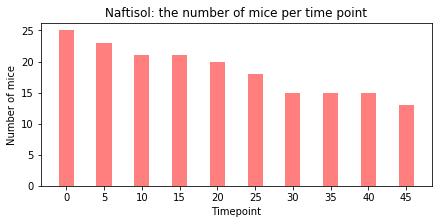

In [115]:
#groupby "Timepoint"
Naftisol_grp = Naftisol_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Naftisol =Naftisol_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Naftisol_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Naftisol, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Naftisol: the number of mice per time point")
plt.show()

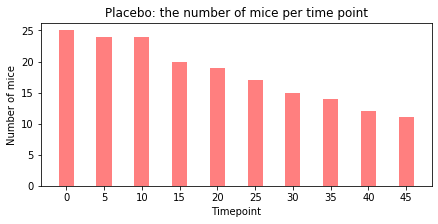

In [116]:
#groupby "Timepoint"
Placebo_grp = Placebo_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Placebol =Placebo_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Placebo_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Placebo, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Placebo: the number of mice per time point")
plt.show()

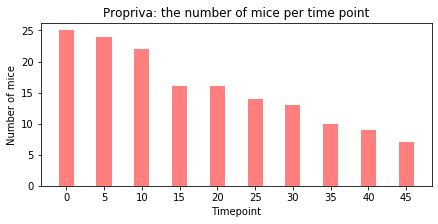

In [117]:
#groupby "Timepoint"
Propriva_grp = Propriva_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Propriva =Propriva_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Propriva_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Propriva, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Propriva: the number of mice per time point")
plt.show()

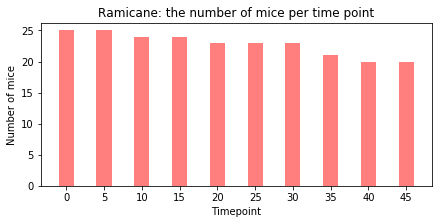

In [118]:
#groupby "Timepoint"
Ramicane_grp = Ramicane_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Ramicane =Ramicane_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Ramicane_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Ramicane, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Ramicane: the number of mice per time point")
plt.show()

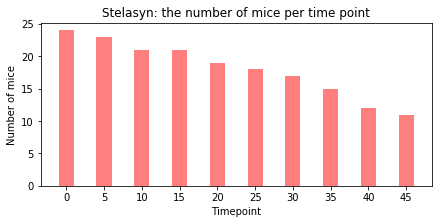

In [119]:
#groupby "Timepoint"
Stelasyn_grp =Stelasyn_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Stelasyn =Stelasyn_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Stelasyn_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Stelasyn, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Stelasyn: the number of mice per time point")
plt.show()

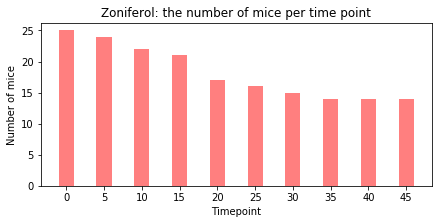

In [120]:
#groupby "Timepoint"
Zoniferol_grp = Zoniferol_df.groupby("Timepoint")
#number of mice per timepoint
nMice_Zoniferol =Zoniferol_grp["Mouse ID"].count()  

#define x-axis : unique value from "Timepoint" column
x_axis= Zoniferol_df["Timepoint"].unique()

plt.figure(figsize=(7,3))
plt.bar(x_axis, nMice_Zoniferol, width=2,color='r', alpha =0.5)
plt.xlabel("Timepoint")
plt.ylabel("Number of mice")
plt.xticks(x_axis)
plt.title("Zoniferol: the number of mice per time point")
plt.show()

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
